# Логистическая регрессия. Практическая работа

## Цель практической работы

Вы уже делали задание, в котором с помощью метода ближайших соседей оценивали склонность клиента банка откликнуться или не откликнуться на предложение.

В этом практическом задании ваши цели:
*  решить эту же задачу с помощью логистической регрессии;
*  потренироваться в подборе порога; 
*  потренироваться в подборе гиперпараметров модели.

## Что входит в работу

*  Загрузить данные для задачи.
*  Обучить метод ближайших соседей с заданным количеством соседей k, вычислить метрики.
*  Обучить логистическую регрессию с параметрами по умолчанию, вычислить метрики.
*  Подобрать порог модели, вычислить метрики.
*  Подобрать гиперпараметр С (константа регуляризации) модели, вычислить метрики.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания — впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

In [1]:
# подключим библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# считаем данные
data = pd.read_csv('data/ClientsData.csv')

In [3]:
print(data.columns)
print(data.shape)
print(data['TARGET'].value_counts())
data.head()

Index(['AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
       'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL',
       'LOAN_NUM_CLOSED', 'LOAN_DLQ_NUM', 'TARGET'],
      dtype='object')
(15223, 11)
TARGET
0    13411
1     1812
Name: count, dtype: int64


,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


В этом ноутбуке нам придётся подбирать гиперпараметры модели, а ещё порог. Поэтому, чтобы не переобучиться, разобъём данные на трейн, валидацию и тест.

*  Обучать модели будем на тренировочных данных.
*  Подбирать необходимые величины — по валидации.
*  Оценивать качество — на тесте.

In [4]:
# разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, train_size=0.7, random_state=123)

В задании по методу ближайших соседей было найдено, что оптимальное число соседей k = 9.

Обучите на тренировочных данных KNN с k = 9 и выведите матрицу ошибок, а также значение метрик precision и recall на тестовых данных.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_score, recall_score

In [6]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')

knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [7]:
y_pred = knn.predict(Xtest)

In [8]:
# Вычисление:
# precision
# recall
# f1-score
# confusion_matrix

unique_classes = np.unique(ytest)
res = classification_report(ytest, y_pred, target_names=[str(c) for c in unique_classes])
print(res)
print( confusion_matrix(ytest, y_pred), 'confusion_matrix')


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4008
           1       0.14      0.04      0.06       559

    accuracy                           0.86      4567
   macro avg       0.51      0.50      0.49      4567
weighted avg       0.79      0.86      0.82      4567

[[3888  120]
 [ 539   20]] confusion_matrix


In [9]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

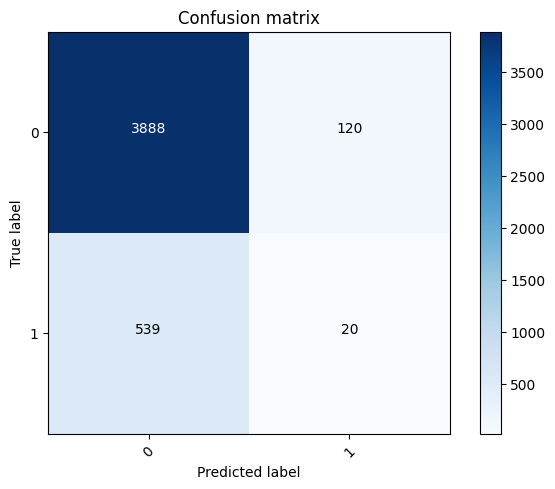

In [10]:
plot_confusion_matrix(confusion_matrix(ytest, y_pred), classes=['0','1'],
                      title='Confusion matrix')


                      

Какой вывод можно сделать:
- для класса 0 — клиент не откликнулся — мы получили достаточно высокие значения TP в том числе потому, что представителей этого класса больше;
- для класса 1 — клиент откликнулся — мы получили низкие значения TN.

Поэтому значения precision и recall низкие. Модель даёт неудовлетворительные результаты, так как находит мало клиентов, которые откликнутся на предложение.



Обучите логистическую регрессию с параметрами по умолчанию и посмотрите на метрики.

Везде дальше при оценке метрик надо выводить confusion_matrix, precision и recall.

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [12]:
logreg_pred = logreg.predict(Xtest)

In [13]:
# Вычисление:
# precision
# recall
# f1-score
# confusion_matrix

unique_classes = np.unique(ytest)
res = classification_report(ytest, y_pred, target_names=[str(c) for c in unique_classes])
print('KNN')
print(res)
print( confusion_matrix(ytest, y_pred), 'confusion_matrix')



unique_classes_l = np.unique(ytest)
res_logreg = classification_report(ytest, logreg_pred, target_names=[str(c) for c in unique_classes_l])
print('logreg')
print(res_logreg)
print( confusion_matrix(ytest, logreg_pred), 'confusion_matrix')

KNN
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4008
           1       0.14      0.04      0.06       559

    accuracy                           0.86      4567
   macro avg       0.51      0.50      0.49      4567
weighted avg       0.79      0.86      0.82      4567

[[3888  120]
 [ 539   20]] confusion_matrix
logreg
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4008
           1       0.00      0.00      0.00       559

    accuracy                           0.88      4567
   macro avg       0.44      0.50      0.47      4567
weighted avg       0.77      0.88      0.82      4567

[[4004    4]
 [ 559    0]] confusion_matrix


Наша цель — найти как можно больше клиентов, которые откликнутся на предложение. А модель таких не находит. 

Мы помним, что метод predict_proba у логистической регрессии предсказывает математические (то есть корректные) вероятности классов. Предскажите вероятности классов с помощью обученной логистической регрессии на тестовых данных и выведите вероятности положительного класса для первых десяти объектов. 



In [14]:
probs = logreg.predict_proba(Xtest)
probs[:10].round(3)

array([[0.929, 0.071],
       [0.885, 0.115],
       [0.708, 0.292],
       [0.781, 0.219],
       [0.861, 0.139],
       [0.955, 0.045],
       [0.936, 0.064],
       [0.964, 0.036],
       [0.943, 0.057],
       [0.931, 0.069]])

In [15]:
probs = logreg.predict_proba(Xtest)
positive_probs = probs[:, 1]  # Получаем вероятности для положительного класса
positive_probs[:10].round(3)


array([0.071, 0.115, 0.292, 0.219, 0.139, 0.045, 0.064, 0.036, 0.057,
       0.069])

In [16]:
print(res_logreg)
print( confusion_matrix(ytest, logreg_pred), 'confusion_matrix')

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4008
           1       0.00      0.00      0.00       559

    accuracy                           0.88      4567
   macro avg       0.44      0.50      0.47      4567
weighted avg       0.77      0.88      0.82      4567

[[4004    4]
 [ 559    0]] confusion_matrix


Глядя на полученные вероятности, попробуйте объяснить, почему вы получили именно такую матрицу ошибок и такие значения точности с полноты.

In [17]:
# ваш код здесь

In [18]:
# ваше объяснение здесь

Давайте уточним цель. Пусть нам нужно найти как можно больше клиентов, которые откликнутся на предложение, то есть максимизировать полноту (recall). 

При этом хочется, чтобы точность модели (precision) не была очень низкой. Заказчик посмотрел на результаты работы KNN и потребовал, чтобы точность была не ниже, чем у KNN: $precision \geq 0.13$.

Давайте будем изменять порог для перевода вероятности в классы так, чтобы:
*   максимизировать значение recall
*   при условии, что $precision \geq 0.13$.

Если мы будем подбирать порог по тестовой выборке, то, по сути, обучимся на ней и, значит, переобучимся. Это плохо. 

Поэтому предскажите вероятности на валидационной выборке и подберите порог по ней (Xval, yval), а затем посмотрите, какое качество для найденного порога вы получите на тестовых данных.


порог: 0.07700000000000003
точность: 0.13153384747215083
полнота: 0.8696883852691218

Максимальная полнота: 0.8696883852691218, при пороге: 0.07700000000000003, точности: 0.13153384747215083


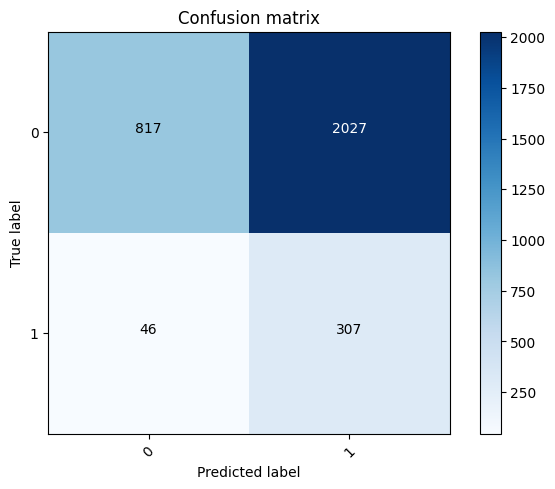

In [19]:
probs_val = logreg.predict_proba(Xval)[:, 1]

max_recall = -1
thr = -1
prec = -1

for threshold in np.arange(0.05, 1, 0.001):
    classes = (probs_val > threshold).astype(int)

    precision = precision_score(yval, classes)
    recall = recall_score(yval, classes)

    if precision >= 0.131 and recall > max_recall:
        max_recall = recall
        best_threshold = threshold
        best_precision = precision

        print('\nпорог:', threshold)
        plot_confusion_matrix(confusion_matrix(yval, classes), classes=['0', '1'],
                              title='Confusion matrix')
        print('точность:', precision)
        print('полнота:', recall)

print(f'\nМаксимальная полнота: {max_recall}, при пороге: {best_threshold}, точности: {best_precision}')
show()

In [20]:
# по найденному порогу переведите вероятности в классы на тесте и напечатайте метрики

# Получение вероятностей для класса 1
proba = logreg.predict_proba(Xtest)[:, 1]

# Установка порога
threshold = best_threshold

# Применение порога для получения предсказаний
predictions = np.where(proba >= threshold, 1, 0)

In [21]:
unique_classes_show = np.unique(ytest)
res_logreg_show = classification_report(ytest, predictions, target_names=[str(c) for c in unique_classes_show])

print('logreg_with_threshold')
print(res_logreg_show)
print( confusion_matrix(ytest, predictions), 'confusion_matrix')

print('KNN')

print(res)
print( confusion_matrix(ytest, y_pred), 'confusion_matrix')



logreg_with_threshold
              precision    recall  f1-score   support

           0       0.92      0.29      0.44      4008
           1       0.14      0.83      0.24       559

    accuracy                           0.36      4567
   macro avg       0.53      0.56      0.34      4567
weighted avg       0.83      0.36      0.42      4567

[[1158 2850]
 [  94  465]] confusion_matrix
KNN
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4008
           1       0.14      0.04      0.06       559

    accuracy                           0.86      4567
   macro avg       0.51      0.50      0.49      4567
weighted avg       0.79      0.86      0.82      4567

[[3888  120]
 [ 539   20]] confusion_matrix


Сделайте вывод. Смогли ли мы с помощью подбора порога добиться большего значения recall, чем у KNN? 

In [22]:
# Да модель смогла предсказать большинство target == 1

А ещё, чтобы улучшить качество предсказания, можно подбирать значение гиперпараметра C у логистической регрессии. Для каждого значения C придётся подбирать свой порог, поэтому:  

1. Обучите для значений C из диапазона [0.05, 0.15, 0.25, ...., 10.05] логистическую регрессию (на тренировочных данных).

2. Для каждой из обученных моделей во внутреннем цикле подберите оптимальный порог (как в предыдущем задании) — на валидационных данных.



В качестве результата выведите значение C и порога для модели, которая даёт наилучшие значения метрик (наибольший recall при ограничении на $precision \geq 0.13$).

Также напечатайте полученные метрики (матрицу ошибок, точность и полноту) для лучшей модели — на тестовых данных.

In [23]:
regs = []
recalls = []
thresholds = []
precisions = []

for reg in np.arange(0.001, 1, 0.01):

    # обучите логистическую регрессию с C=reg

    model = LogisticRegression(
        C=reg,  # Параметр регуляризации
        random_state=42,  # Фиксируем случайность
    )

    max_recall = -1
    thr = -1
    prec = -1

    for threshold in np.arange(0.05, 0.25, 0.001):
        classes = (probs_val > threshold).astype(int)

        precision = precision_score(yval, classes)
        recall = recall_score(yval, classes)

        if precision >= 0.131 and recall > max_recall:
            max_recall = recall
            best_threshold = threshold
            best_precision = precision
            best_C = reg

            #print('\nпорог:', threshold)
            #plot_confusion_matrix(confusion_matrix(yval, classes), classes=['0', '1'], title='Confusion matrix')
            #print('точность:', precision)
            #print('полнота:', recall)

    #print(f'\nМаксимальная полнота: {max_recall}, при пороге: {best_threshold}, точности: {best_precision}')
    #show()
    
    

    recalls.append(max_recall)
    thresholds.append(thr)
    precisions.append(prec)
    regs.append(reg)

print(f'\nМаксимальная полнота: {max_recall}, при пороге: {best_threshold}, точности: {best_precision}')
show()


Максимальная полнота: 0.8696883852691218, при пороге: 0.07700000000000003, точности: 0.13153384747215083


In [24]:
# выведите значения C, precision, recall, threshold для наилучшей по заданным условиям модели
print('C: ', best_C)
print('precision: ', best_precision)
print('recall: ', max_recall)
print('treashold: ', best_threshold)


C:  0.9909999999999999
precision:  0.13153384747215083
recall:  0.8696883852691218
treashold:  0.07700000000000003


In [25]:
# с помощью найденных C и threshold обучите модель на тренировочных данных, сделайте предсказание на тесте и по найденному порогу получите классы
# напечатайте метрики

logreg_final = LogisticRegression(C=best_C)
logreg_final.fit(Xtrain, ytrain)

predict_final = logreg_final.predict(Xtest)



In [26]:
# Получение вероятностей для класса 1
proba = logreg_final.predict_proba(Xtest)[:, 1]

# Установка порога
threshold = best_threshold

# Применение порога для получения предсказаний
predict_fin_thr = np.where(proba >= threshold, 1, 0)

In [31]:
unique_classes_show = np.unique(ytest)

print('---logreg_start----------------')
print(res_logreg)
print( confusion_matrix(ytest, logreg_pred), 'confusion_matrix')

res_logreg_show = classification_report(ytest, predictions, target_names=[str(c) for c in unique_classes_show])
print('---logreg_with_threshold--------')
print(res_logreg_show)
print( confusion_matrix(ytest, predictions), 'confusion_matrix')

res_logreg_final = classification_report(ytest, predict_final, target_names=[str(c) for c in unique_classes_show])
print('---logreg_final-----------------')
print(res_logreg_final)
print( confusion_matrix(ytest, predict_final), 'confusion_matrix')

res_logreg_treashold = classification_report(ytest, predict_fin_thr, target_names=[str(c) for c in unique_classes_show])
print('---logreg_final_threshold-------')
print(res_logreg_treashold)
print( confusion_matrix(ytest, predict_fin_thr), 'confusion_matrix')



---logreg_start----------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4008
           1       0.00      0.00      0.00       559

    accuracy                           0.88      4567
   macro avg       0.44      0.50      0.47      4567
weighted avg       0.77      0.88      0.82      4567

[[4004    4]
 [ 559    0]] confusion_matrix
---logreg_with_threshold--------
              precision    recall  f1-score   support

           0       0.92      0.29      0.44      4008
           1       0.14      0.83      0.24       559

    accuracy                           0.36      4567
   macro avg       0.53      0.56      0.34      4567
weighted avg       0.83      0.36      0.42      4567

[[1158 2850]
 [  94  465]] confusion_matrix
---logreg_final-----------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4008
           1       0.00      0.00      0.00       5

Влияет ли изменение гиперпараметра C на качество модели (и, соответственно, метрики) в этой задаче?

In [28]:
# ваш вывод здесь
# В данном ноутбуке изменение параметра  С в LogReg изменило модель следующим образом:
# никак
# метрики предсказания модели не изменились

Ответьте развёрнуто на следующие вопросы:

* Удалось ли при помощи логистической регрессии и подбора порога превзойти качество метода ближайших соседей в этой задаче? 

* Смогли ли мы при помощи этой модели получить высокий recall при ограничениях, поставленных заказчиком?


In [29]:
# ваш вывод здесь
# При использовании LogReg совместно с подбором порога удалось превзойти KNN значительно
# Мы смогли при помощи этой модели получить высокий recall при ограничениях, поставленных заказчиком